In [1]:
import os
import zipfile
import requests
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

2024-07-26 14:37:33.745749: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def download_file(url, local_filename):
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

# Download the dataset
url = 'https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip'
output = 'cats_and_dogs.zip'
download_file(url, output)

# Extract the dataset
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall('cats_and_dogs')


In [3]:

!unzip cats_and_dogs.zip

Archive:  cats_and_dogs.zip
  inflating: cats_and_dogs/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cats_and_dogs/
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
   creating: cats_and_dogs/test/
  inflating: cats_and_dogs/test/48.jpg  
   creating: __MACOSX/cats_and_dogs/test/
  inflating: __MACOSX/cats_and_dogs/test/._48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating: __MACOSX/cats_and_dogs/test/._49.jpg  
  inflating: cats_and_dogs/test/.DS_Store  
  inflating: __MACOSX/cats_and_dogs/test/._.DS_Store  
  inflating: cats_and_dogs/test/8.jpg  
  inflating: __MACOSX/cats_and_dogs/test/._8.jpg  
  inflating: cats_and_dogs/test/9.jpg  
  inflating: __MACOSX/cats_and_dogs/test/._9.jpg  
  inflating: cats_and_dogs/test/14.jpg  
  inflating: __MACOSX/cats_and_dogs/test/._14.jpg  
  inflating: cats_and_dogs/test/28.jpg  
  inflating: __MACOSX/cats_and_dogs/test/._28.jpg  
  inflating: cats_and_dogs/test/29.jpg  
  inflating: __MACOSX/cats_and_dogs/test/._29.jpg  
  

In [4]:
base_dir = 'cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

total_train = sum([len(files) for r, d, files in os.walk(train_dir)])-1
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])-1
total_test = len(os.listdir(test_dir))-1

# Variables for pre-processing and training
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Print dataset info
print('Train:', total_train)
print('Validation:', total_val)
print('Test:', total_test)

Train: 2000
Validation: 1000
Test: 50


In [36]:

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
                    train_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')

val_data_gen   = validation_image_generator.flow_from_directory(
                    validation_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')

test_data_gen  = test_image_generator.flow_from_directory(
                    base_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    classes=['test'],
                    shuffle=False)
     

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


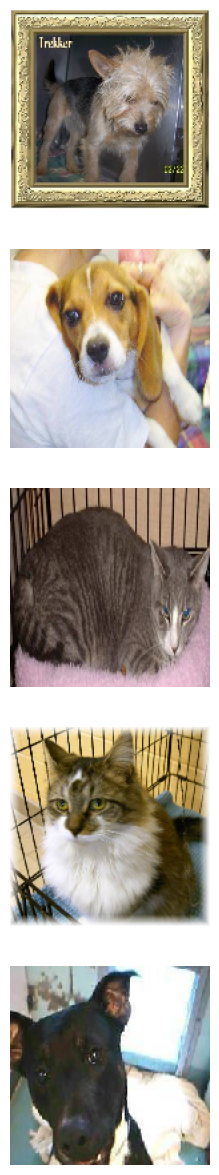

In [6]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [7]:
#5
train_image_generator = ImageDataGenerator(
rescale = 1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.15,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')

Found 2000 images belonging to 2 classes.


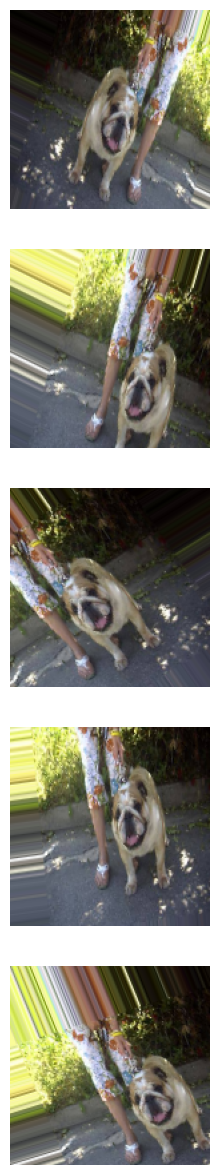

In [8]:
#6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 240,832 (940.75 KB)

 Trainable params: 240,832 (940.75 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [40]:
from math import ceil
train_steps = int(ceil(1. * total_train / batch_size))
val_steps   = int(ceil(1. * total_val / batch_size))

print(train_steps, val_steps)

16 8


In [42]:
history = model.fit(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen
)

Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.5287 - loss: 0.6880 - val_accuracy: 0.6300 - val_loss: 0.6842
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 53s 3s/step - accuracy: 0.5696 - loss: 0.6859 - val_accuracy: 0.5660 - val_loss: 0.6820
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5786 - loss: 0.6803 - val_accuracy: 0.5520 - val_loss: 0.6809
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.5845 - loss: 0.6716 - val_accuracy: 0.6120 - val_loss: 0.6655
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5917 - loss: 0.6693 - val_accuracy: 0.5060 - val_loss: 0.7153
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.5873 - loss: 0.6750 - val_accuracy: 0.5730 - val_loss: 0.6718
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - accuracy: 0.6366 - loss: 0.6547 - val_accuracy: 0.6580 - val_loss: 0.6473
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.6062 - loss: 0.6562 - val_accuracy: 0.5220 - val_loss:

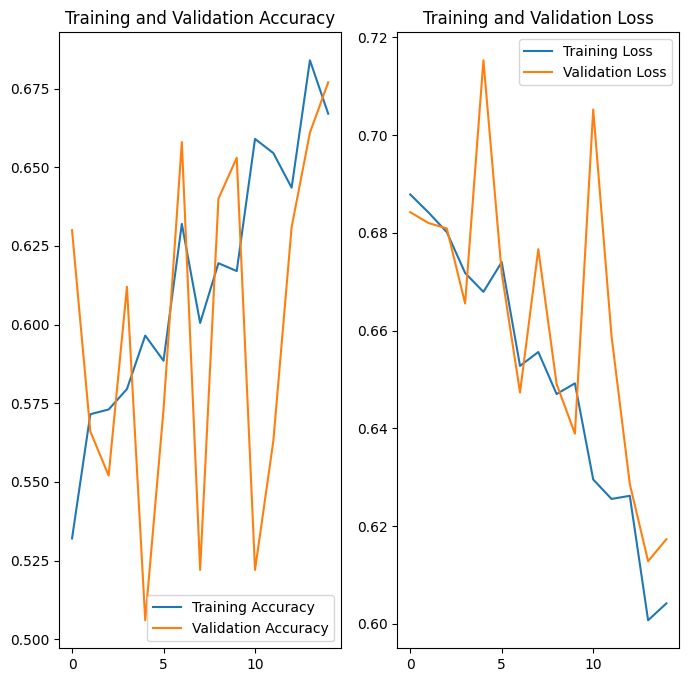

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
probabilities = model.predict(test_data_gen).flatten()
probabilities

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([0.3140976 , 0.22533184, 0.3707077 , 0.61946136, 0.55111957,
       0.2889834 , 0.5188266 , 0.26479158, 0.58253646, 0.56355304,
       0.497376  , 0.46905112, 0.25518847, 0.1031208 , 0.34644255,
       0.64023745, 0.5543993 , 0.5779848 , 0.46164832, 0.5044461 ,
       0.33122915, 0.4376892 , 0.37469506, 0.53828454, 0.41613302,
       0.31935436, 0.4729486 , 0.31800136, 0.28525123, 0.45551106,
       0.37758413, 0.3131666 , 0.5018222 , 0.8636537 , 0.31832168,
       0.53027713, 0.8481321 , 0.5838878 , 0.33036205, 0.40464634,
       0.25915223, 0.39513978, 0.5544795 , 0.47925636, 0.50393295,
       0.5148658 , 0.3482958 , 0.40804654, 0.5217662 , 0.29605508],
      dtype=float32)

In [46]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 66.0% of the images of cats and dogs.
You passed the challenge!
